In [1]:
import pandas as pd
import numpy as np

# Load the main dataset
train_x = pd.read_csv('train_x.csv')

# Load the additional scale datasets
st_scale = pd.read_csv('ST-scale.csv', skiprows=2)
t_scale = pd.read_csv('T-scale.csv', skiprows=2)
z_scale = pd.read_csv('Z-scale.csv', skiprows=2)
dpps = pd.read_csv("DPPS.csv", skiprows=2)
whim = pd.read_csv("MS-WHIM.csv", skiprows=2)
phys = pd.read_csv("Physical.csv", skiprows=2)
vhse = pd.read_csv("VHSE-scale.csv", skiprows=2)

In [2]:
# Create mapping dictionaries for each scale
st_dict = st_scale.set_index('AA_1').to_dict('index')#
t_dict = t_scale.set_index('AA_1').to_dict('index')#
z_dict = z_scale.set_index('AA_1').to_dict('index')#
dpps_dict = dpps.set_index('AA_1').to_dict('index')#
whim_dict = whim.set_index('AA_1').to_dict('index')#
phys_dict = phys.set_index('AA_1').to_dict('index')
vhse_dict = vhse.set_index('AA_1').to_dict('index')#

In [3]:
def enrich_sequence(sequence):
    enriched_sequence = []
    for aa in sequence:
        properties = {}
        if aa in st_dict:
            properties.update({f'ST{i}': st_dict[aa][f'ST{i}'] for i in range(1, 9)})
        if aa in t_dict:
            properties.update({f'T{i}': t_dict[aa][f'T{i}'] for i in range(1, 6)})
        if aa in z_dict:
            properties.update({f'Z{i}': z_dict[aa][f'Z({i})'] for i in range(1, 4)})
        if aa in dpps_dict:
            properties.update({f'D{i}': dpps_dict[aa][f'D{i}'] for i in range(1, 11)})
        if aa in vhse_dict:
            properties.update({f'VHSE{i}': vhse_dict[aa][f'VHSE{i}'] for i in range(1, 9)})
        if aa in whim_dict:
            properties.update({f'WHIM{i}': whim_dict[aa][f'{i}'] for i in range(1,4)})
        if aa in phys_dict:
            properties.update({f'{i}': phys_dict[aa][f'{i}'] for i in ["Vol", "Hydro"]})
        enriched_sequence.append((aa, properties))
    return enriched_sequence

In [4]:
# Apply the enrichment function to the 'ConstructedAASeq_cln' column
train_x['EnrichedSequence'] = train_x['ConstructedAASeq_cln'].apply(enrich_sequence)

In [5]:
# Create new columns for each property
all_properties = ['ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 
                  'T1', 'T2', 'T3', 'T4', 'T5', 
                  'Z1', 'Z2', 'Z3',
                 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
                 'VHSE1', 'VHSE2', 'VHSE3', 'VHSE4', 'VHSE5', 'VHSE6', 'VHSE7', 'VHSE8',
                'WHIM1', 'WHIM2', 'WHIM3','Vol', 'Hydro']
for prop in all_properties:
    train_x[f'Mean_{prop}'] = train_x['EnrichedSequence'].apply(lambda seq: np.mean([float(aa[1].get(prop, 0)) for aa in seq]))
    print(prop)
# Remove the temporary 'EnrichedSequence' column
train_x = train_x.drop('EnrichedSequence', axis=1)

ST1
ST2
ST3
ST4
ST5
ST6
ST7
ST8
T1
T2
T3
T4
T5
Z1
Z2
Z3
D1
D2
D3
D4
D5
D6
D7
D8
D9
D10
VHSE1
VHSE2
VHSE3
VHSE4
VHSE5
VHSE6
VHSE7
VHSE8
WHIM1
WHIM2
WHIM3
Vol
Hydro


In [6]:
train_y = pd.read_csv("train_y.csv")
train_y.head()

,Unnamed: 0,Brightness_Class,Id
0,0,0,11328
1,1,0,5781
2,2,0,13681
3,3,0,30804
4,4,0,30813


In [7]:
# Save the enriched dataset
train_x = train_x.drop('Unnamed: 0', axis = 1)
train_x = train_x.drop('ConstructedAASeq_cln', axis = 1)
train_x = train_x.drop('Id', axis = 1)
Y = train_y.Brightness_Class
train_x.info()
train_x.to_csv('enriched_train_x.csv', index=False)
print("Dataset enrichment complete. New file saved as 'enriched_train_x.csv'")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31029 entries, 0 to 31028
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Mean_ST1    31029 non-null  float64
 1   Mean_ST2    31029 non-null  float64
 2   Mean_ST3    31029 non-null  float64
 3   Mean_ST4    31029 non-null  float64
 4   Mean_ST5    31029 non-null  float64
 5   Mean_ST6    31029 non-null  float64
 6   Mean_ST7    31029 non-null  float64
 7   Mean_ST8    31029 non-null  float64
 8   Mean_T1     31029 non-null  float64
 9   Mean_T2     31029 non-null  float64
 10  Mean_T3     31029 non-null  float64
 11  Mean_T4     31029 non-null  float64
 12  Mean_T5     31029 non-null  float64
 13  Mean_Z1     31029 non-null  float64
 14  Mean_Z2     31029 non-null  float64
 15  Mean_Z3     31029 non-null  float64
 16  Mean_D1     31029 non-null  float64
 17  Mean_D2     31029 non-null  float64
 18  Mean_D3     31029 non-null  float64
 19  Mean_D4     31029 non-nul

In [9]:
train_x.head()

,Mean_ST1,Mean_ST2,Mean_ST3,Mean_ST4,Mean_ST5,Mean_ST6,Mean_ST7,Mean_ST8,Mean_T1,Mean_T2,...,Mean_VHSE4,Mean_VHSE5,Mean_VHSE6,Mean_VHSE7,Mean_VHSE8,Mean_WHIM1,Mean_WHIM2,Mean_WHIM3,Mean_Vol,Mean_Hydro
0,-0.838481,-0.156819,-0.175827,-0.072506,-0.041325,-0.232034,0.059203,0.229169,-4.449198,-0.001224,...,-0.003797,-0.155105,-0.152827,0.258565,-0.022785,-0.235738,0.338354,-0.409198,-0.366624,0.047595
1,-0.836755,-0.147038,-0.163591,-0.068937,-0.044911,-0.240274,0.059785,0.227013,-4.440633,-0.021350,...,0.018059,-0.172532,-0.140169,0.251899,-0.016118,-0.222025,0.330338,-0.409494,-0.368101,0.041224
2,-0.840945,-0.140422,-0.183236,-0.072489,-0.033380,-0.240751,0.073295,0.247996,-4.467890,0.040253,...,0.015527,-0.184473,-0.149072,0.280169,-0.021857,-0.236709,0.319536,-0.399409,-0.375316,0.061097
3,-0.838114,-0.150688,-0.164671,-0.064793,-0.048384,-0.226186,0.063367,0.226025,-4.447679,0.001857,...,0.001055,-0.152869,-0.147553,0.253840,-0.028143,-0.236034,0.337342,-0.405105,-0.360633,0.039662
4,-0.832502,-0.152101,-0.163983,-0.068456,-0.049392,-0.230418,0.061975,0.216616,-4.412954,-0.018228,...,0.001139,-0.168143,-0.150253,0.243207,-0.006371,-0.227089,0.336751,-0.406287,-0.347342,0.031983


In [10]:
whim_dict

{'A': {'AA_3': 'Ala', '1': -0.73, '2': 0.2, '3': -0.62},
 'R': {'AA_3': 'Arg', '1': -0.22, '2': 0.27, '3': 1.0},
 'N': {'AA_3': 'Asn', '1': 0.14, '2': 0.2, '3': -0.66},
 'D': {'AA_3': 'Asp', '1': 0.11, '2': -1.0, '3': -0.96},
 'C': {'AA_3': 'Cys', '1': -0.66, '2': 0.26, '3': -0.27},
 'Q': {'AA_3': 'Gln', '1': 0.3, '2': 1.0, '3': -0.3},
 'E': {'AA_3': 'Glu', '1': 0.24, '2': -0.39, '3': -0.04},
 'G': {'AA_3': 'Gly', '1': -0.31, '2': -0.28, '3': -0.75},
 'H': {'AA_3': 'His', '1': 0.84, '2': 0.67, '3': -0.78},
 'I': {'AA_3': 'Ile', '1': -0.91, '2': 0.83, '3': -0.25},
 'L': {'AA_3': 'Leu', '1': -0.74, '2': 0.72, '3': -0.16},
 'K': {'AA_3': 'Lys', '1': -0.51, '2': 0.08, '3': 0.6},
 'M': {'AA_3': 'Met', '1': -0.7, '2': 1.0, '3': -0.32},
 'F': {'AA_3': 'Phe', '1': 0.76, '2': 0.85, '3': -0.34},
 'P': {'AA_3': 'Pro', '1': -0.43, '2': 0.73, '3': -0.6},
 'S': {'AA_3': 'Ser', '1': -0.8, '2': 0.61, '3': -1.0},
 'T': {'AA_3': 'Thr', '1': -0.58, '2': 0.85, '3': -0.89},
 'W': {'AA_3': 'Trp', '1': 1.0, 

In [11]:
only1 = []
for k in train_x.columns:
    if train_x[k].nunique() != train_x.shape[0]:
        only1.append(train_x[k].nunique())        

In [12]:
for i in train_x.columns:
    if train_x[i].isna().sum()!=0:
        print(i,train_x[i].isna().sum())

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
trainn_x = s.fit_transform(train_x)
X_train, X_test, y_train, y_test = train_test_split(trainn_x, Y,test_size=0.3, random_state=42)

In [43]:
logr = LogisticRegression()
logr.fit(X_train, y_train)
predict = logr.predict(X_test)
logr.score(X_test, y_test)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6275647223117413

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
decision_tree = DecisionTreeClassifier()
# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Get the best score
best_score = grid_search.best_score_
print("Best cross-validation score:", best_score)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set score:", test_score)


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation score: 0.6958563535911602
Test set score: 0.691696207970781


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

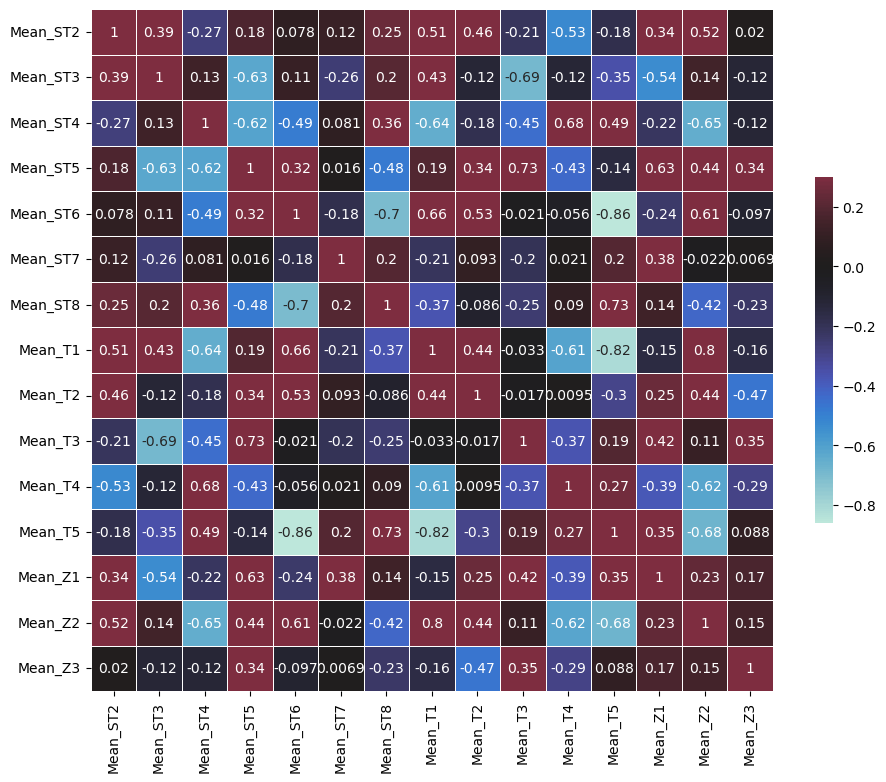

In [21]:
# Compute the correlation matrix
corr = train_x.iloc[:, 1:16].corr()

# Generate a mask for the upper triangle

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(130, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train_x.iloc[:, 1:16].corr(), vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [23]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=10000))
])

# Define the parameter grid
param_grid = {
    'logistic__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logistic__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logistic__fit_intercept': [True, False],
    'logistic__class_weight': [None, 'balanced'],
    'logistic__random_state': [42],
    'logistic__l1_ratio': [0, 0.25, 0.5, 0.75, 1],  # Only used when penalty='elasticnet'
    'logistic__multi_class': ['auto', 'ovr', 'multinomial'],
    'logistic__warm_start': [True, False],
    'logistic__n_jobs': [-1]
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1000
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set score:", test_score)


Fitting 5 folds for each of 14400 candidates, totalling 72000 fits


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
45600 fits failed out of a total of 72000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_e

Best parameters: {'logistic__C': 0.01, 'logistic__class_weight': 'balanced', 'logistic__fit_intercept': True, 'logistic__l1_ratio': 0.25, 'logistic__multi_class': 'multinomial', 'logistic__n_jobs': -1, 'logistic__penalty': 'elasticnet', 'logistic__random_state': 42, 'logistic__solver': 'saga', 'logistic__warm_start': True}
Best cross-validation score: 0.6673112338858196
Test set score: 0.6676334729831346


In [24]:
import pickle

# save
with open('model.pkl','wb') as f:
    pickle.dump(best_model,f)

In [25]:
test_x = pd.read_csv("test_X.csv")
test_x['EnrichedSequence'] = test_x['ConstructedAASeq_cln'].apply(enrich_sequence)
for prop in all_properties:
    test_x[f'Mean_{prop}'] = test_x['EnrichedSequence'].apply(lambda seq: np.mean([float(aa[1].get(prop, 0)) for aa in seq]))
    print(prop)
# Remove the temporary 'EnrichedSequence' column
test_x = test_x.drop('EnrichedSequence', axis=1)
test_x.head()

ST1
ST2
ST3
ST4
ST5
ST6
ST7
ST8
T1
T2
T3
T4
T5
Z1
Z2
Z3
D1
D2
D3
D4
D5
D6
D7
D8
D9
D10
VHSE1
VHSE2
VHSE3
VHSE4
VHSE5
VHSE6
VHSE7
VHSE8
WHIM1
WHIM2
WHIM3
Vol
Hydro


,ConstructedAASeq_cln,Id,Mean_ST1,Mean_ST2,Mean_ST3,Mean_ST4,Mean_ST5,Mean_ST6,Mean_ST7,Mean_ST8,...,Mean_VHSE4,Mean_VHSE5,Mean_VHSE6,Mean_VHSE7,Mean_VHSE8,Mean_WHIM1,Mean_WHIM2,Mean_WHIM3,Mean_Vol,Mean_Hydro
0,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,50579,-0.832907,-0.149325,-0.158169,-0.067624,-0.052705,-0.220903,0.061494,0.230954,...,0.003797,-0.159958,-0.144388,0.250844,-0.026034,-0.228059,0.330970,-0.402363,-0.346920,0.034515
1,SKGEELFTGVVPILVELDGDVSGHKFSVSGEGEGDATYGKLTLKFI...,37987,-0.834439,-0.153127,-0.158101,-0.065620,-0.058025,-0.215498,0.064637,0.226861,...,-0.008776,-0.159325,-0.148776,0.240970,-0.018945,-0.234051,0.335992,-0.404388,-0.346751,0.026329
2,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,53977,-0.840679,-0.151907,-0.155114,-0.061932,-0.065354,-0.226194,0.076844,0.236498,...,0.008861,-0.133080,-0.151224,0.261097,-0.036456,-0.235105,0.345781,-0.404768,-0.366203,0.016287
3,SKGEELFTGVVPILVELDGDVNGHKLSVSGEGEGDATYGKLTLKFI...,10677,-0.842190,-0.152000,-0.161574,-0.062565,-0.058321,-0.234447,0.061498,0.238873,...,0.006709,-0.159072,-0.166962,0.263671,-0.041519,-0.235190,0.333713,-0.404726,-0.371730,0.021266
4,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,35653,-0.834143,-0.150494,-0.159840,-0.066363,-0.051570,-0.227004,0.061916,0.226186,...,0.001055,-0.150675,-0.144093,0.242827,-0.023840,-0.231646,0.340338,-0.405063,-0.350675,0.036667


In [26]:
test_x.to_csv("Enriched_test_x.csv", index = False)
test_x.info()
id = test_x.Id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20686 entries, 0 to 20685
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ConstructedAASeq_cln  20686 non-null  object 
 1   Id                    20686 non-null  int64  
 2   Mean_ST1              20686 non-null  float64
 3   Mean_ST2              20686 non-null  float64
 4   Mean_ST3              20686 non-null  float64
 5   Mean_ST4              20686 non-null  float64
 6   Mean_ST5              20686 non-null  float64
 7   Mean_ST6              20686 non-null  float64
 8   Mean_ST7              20686 non-null  float64
 9   Mean_ST8              20686 non-null  float64
 10  Mean_T1               20686 non-null  float64
 11  Mean_T2               20686 non-null  float64
 12  Mean_T3               20686 non-null  float64
 13  Mean_T4               20686 non-null  float64
 14  Mean_T5               20686 non-null  float64
 15  Mean_Z1            

In [29]:
test_x = test_x.drop('ConstructedAASeq_cln', axis = 1)
test_x = test_x.drop('Id', axis = 1)

In [37]:
s = StandardScaler()
test_x = s.fit_transform(test_x)
logr.predict(test_x)

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [38]:
y_pred = best_model.predict(test_x)

In [39]:
a = {"Id": id, "Brightness_Class":y_pred}

In [40]:
df = pd.DataFrame(a)

In [41]:
df.to_csv("Submission.csv", index=False)